<a href="https://colab.research.google.com/github/owolabi35/Data/blob/master/Dart_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install darts

  Using cached darts-0.12.0-py3-none-any.whl (253 kB)
  Using cached scikit_learn-0.24.2-cp37-cp37m-manylinux2010_x86_64.whl (22.3 MB)
  Using cached statsmodels-0.12.2-cp37-cp37m-manylinux1_x86_64.whl (9.5 MB)
     |████████████████████████████████| 788 kB 11.6 MB/s 
     |████████████████████████████████| 10.3 MB 60.6 MB/s 
  Using cached holidays-0.11.2-py3-none-any.whl (142 kB)
     |████████████████████████████████| 62 kB 896 kB/s 
     |████████████████████████████████| 28.5 MB 50 kB/s 
     |████████████████████████████████| 9.9 MB 44.2 MB/s 
     |████████████████████████████████| 1.4 MB 58.0 MB/s 
  Using cached lightgbm-3.2.1-py3-none-manylinux1_x86_64.whl (2.0 MB)
     |████████████████████████████████| 177 kB 62.0 MB/s 
     |████████████████████████████████| 804.1 MB 2.7 kB/s 
     |████████████████████████████████| 65 kB 4.2 MB/s 
     |████████████████████████████████| 370 kB 59.0 MB/s 
     |████████████████████████████████| 49 kB 6.0 MB/s 
     |███████████████████████

In [ ]:
from darts.datasets import AirPassengersDataset, MonthlyMilkDataset

In [ ]:
AirPassengersDataset().load().pd_series()

Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
              ...  
1960-08-01    606.0
1960-09-01    508.0
1960-10-01    461.0
1960-11-01    390.0
1960-12-01    432.0
Freq: MS, Length: 144, dtype: float64

In [ ]:
#AirPassengersDataset().load().pd_dataframe()

component,#Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0


In [ ]:
import matplotlib.pyplot as plt
series_air = AirPassengersDataset().load()
series_milk = MonthlyMilkDataset().load()

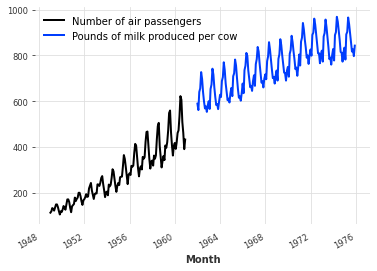

In [ ]:
series_air.plot(label='Number of air passengers')
series_milk.plot(label='Pounds of milk produced per cow')
plt.legend();

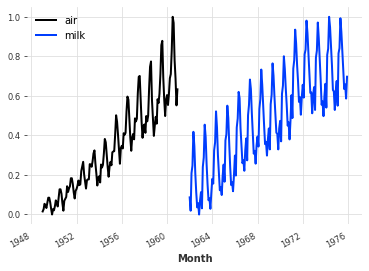

In [ ]:
from darts.dataprocessing.transformers import Scaler
scaler_air, scaler_milk = Scaler(), Scaler()
series_air_scaled = scaler_air.fit_transform(series_air)
series_milk_scaled = scaler_milk.fit_transform(series_milk)

series_air_scaled.plot(label='air')
series_milk_scaled.plot(label='milk')
plt.legend();

In [ ]:
# Train And Validation Split
train_air, val_air = series_air_scaled[:-36], series_air_scaled[-36:]
train_milk, val_milk = series_milk_scaled[:-36], series_milk_scaled[-36:]

In [ ]:
from darts import TimeSeries
from darts.utils.timeseries_generation import gaussian_timeseries, linear_timeseries, sine_timeseries
from darts.models import RNNModel, TCNModel, TransformerModel, NBEATSModel, BlockRNNModel
from darts.metrics import mape, smape

In [ ]:
model_air_milk = NBEATSModel(input_chunk_length=24, output_chunk_length=12, n_epochs=100, random_state=0)

In [ ]:
model_air_milk.fit([train_air, train_milk], verbose=True)

[2021-09-27 18:47:39,269] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 194 samples.
[2021-09-27 18:47:39,269] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 194 samples.
  1%|          | 1/100 [00:01<03:16,  1.98s/it]

 11%|█         | 11/100 [00:20<02:43,  1.84s/it]

 21%|██        | 21/100 [00:39<02:24,  1.82s/it]

 31%|███       | 31/100 [00:59<02:29,  2.17s/it]

 41%|████      | 41/100 [01:23<02:18,  2.35s/it]

 51%|█████     | 51/100 [01:48<01:55,  2.36s/it]

 61%|██████    | 61/100 [02:14<01:45,  2.71s/it]

 71%|███████   | 71/100 [02:37<01:12,  2.50s/it]

 81%|████████  | 81/100 [03:02<00:47,  2.48s/it]

 91%|█████████ | 91/100 [03:27<00:21,  2.40s/it]

100%|██████████| 100/100 [03:49<00:00,  2.29s/it]


MAPE = 26.06%


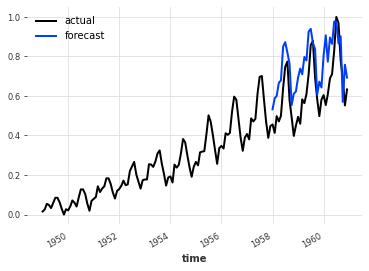

In [ ]:
pred = model_air_milk.predict(n=36, series=train_air)

series_air_scaled.plot(label='actual')
pred.plot(label='forecast')
plt.legend();
print('MAPE = {:.2f}%'.format(mape(series_air_scaled, pred)))

MAPE = 21.77%


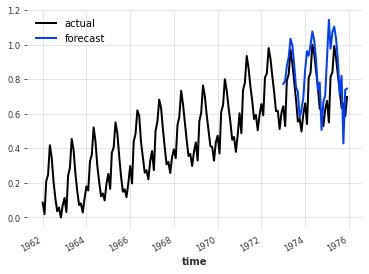

In [17]:
pred = model_air_milk.predict(n=36, series=train_milk)

series_milk_scaled.plot(label='actual')
pred.plot(label='forecast')
plt.legend();
print('MAPE = {:.2f}%'.format(mape(series_milk_scaled, pred)))